In [251]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [252]:
def rss(labels,predictions):
    return np.sum(np.square(labels-predictions))

In [253]:
def generate(N, noise):
    X = np.random.randn(N)

    y = np.sin(X) + noise * np.random.randn(N)

    return X.reshape(-1,1),y

In [254]:
def lr(X,y):
    Xstd = X.std(axis = 0)
    Xmean = X.mean(axis=0)
    Ymean = y.mean(axis = 0)

    X = (X - Xmean)/Xstd
    y = y - Ymean

    coef = np.linalg.inv(X.T @ X) @ X.T @ y
    coef /= Xstd
    
    intercept = Ymean - np.dot(Xmean, coef.T)
    return coef,intercept

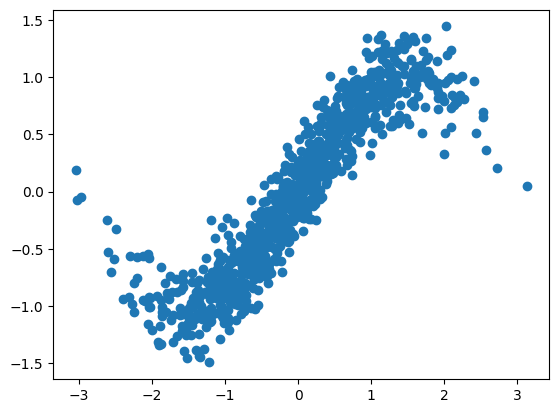

In [337]:
X,y = generate(1000,0.2)
plt.scatter(X, y)

In [340]:
weights = lr(X,y)

In [341]:
weights[0].shape

(1,)

In [342]:
pred = X @ weights[0] + weights[1]

In [343]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
yp = linear_regressor.predict(X)

In [344]:
linear_regressor.coef_, linear_regressor.intercept_

(array([0.62366027]), -0.00043983577243314476)

In [345]:
weights

(array([0.62366027]), -0.00043983577243316557)

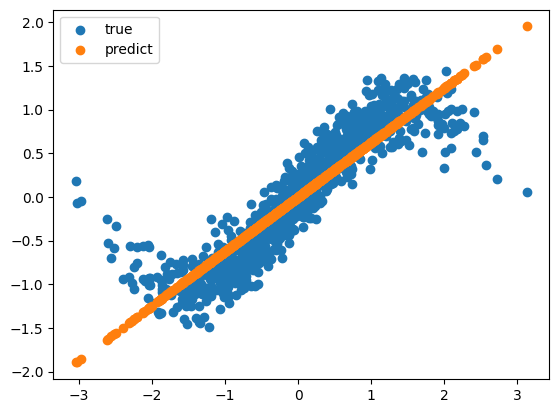

In [347]:
plt.scatter(X,y,label="true")
plt.scatter(X,pred,label="predict")
# plt.scatter(X,yp,label="sklearn")
plt.legend()

In [349]:
print(f"Rss = {rss(labels=y,predictions=pred)}")
print(f"Rss = {rss(labels=y,predictions=pred)}")

Rss = 99.76821700751847
Rss = 99.76821700751847


Gradient descent with known formula:

![image](images/gradientrss.png)

In [350]:
def gradientIntercept(X,y, w):
    return -2 * np.sum(y-(X * w[0] + w[1]))
    # g = 0
    # for i in range(X.shape[0]):
    #     g += y[i] - (w[0] * X[i] + w[1])
    # return -2 * g

def gradientCoef(X,y,w):
    return -2 * np.sum((y - (X * w[0] + w[1])) * X)
    # g = 0
    # for i in range(X.shape[0]):
    #     g += (y[i] - (w[0] * X[i] + w[1])) * X[i]
    # return -2 * g

def gd(X,y):
    weights = np.zeros(2)
    lr = 0.01
    if len(X.shape) == 2:
        X = X.reshape(-1)

    for i in range(100):
        g0 = gradientCoef(X,y,weights)
        g1 = gradientIntercept(X,y,weights)

        w0 = weights[0] - lr/(i+1) * g0
        w1 = weights[1] - lr/(i+1) * g1

        nw = np.array([w0,w1])
        
        if np.linalg.norm(nw-weights) < 1e-5:
            print(f"Stop at iteration {i+1}")
            break
        weights = nw
    return nw[0],nw[1]

In [351]:
wGd = gd(X,y)

Stop at iteration 24


In [352]:
wGd

(0.6236592568224527, -0.00043879859133512085)

In [353]:
predGD = X * wGd[0] + wGd[1]

In [354]:
print(f"Rss = {rss(labels=y,predictions=predGD.reshape(-1))}")
print(f"Rss = {rss(labels=y,predictions=pred)}")

Rss = 99.76821700969595
Rss = 99.76821700751847


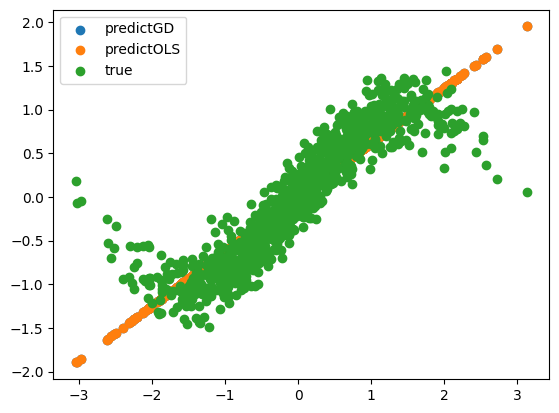

In [355]:
plt.scatter(X,predGD,label="predictGD")
plt.scatter(X,pred,label="predictOLS")
plt.scatter(X,y,label="true")
plt.legend()